# Computational Analysis on *The Moonstone*
### Ki Chan Kim
There is a voice in every story; the author reveals a certain voice through a narrator. While he or she might employ multiple narrators to tell different versions of a story, which themselves can be considered as separate stories, it is that voice that tremendously affects the reader's view on characters and thus the story itself. Nevertheless, readers often look at only the narration and neglect to include in their analysis of the voice what is said in dialogues. In any case that readers do not test the reliability of each narrator, they fail to account for the possibility that the narrator, or the author, might have purposefully chosen to include or to hide certain lines spoken by characters.

In this paper, I am diving into the task of knowing how a voice is formed with respect to dialogues in a novel and the rest of the story. Specifically, does text within quotes contribute to the formation of a story's voice differently from text outside quotes? Or do they go together in one direction or another? Here, *The Moonstone*, by Wilkie Collins, is a great fit for data necessary to carry out the analysis. Due to the unique way in which the novel is divided into different narration parts, each of which is narrated by a different narrator, it is possible to go about the task without compromising varying writing styles, which can cause a problem if to deal with a set of novels written by more than one author or by one author over a relatively longer period of time, which can alter the author's writing styles. Additionally, utilizing the chracteristic of the novel, structural components are set aside among other elements such as "point of voice" and "narrator's access to information" as mentioned by Kori Morgan, an educator at Seattlepi, and the main focus is placed on what words the narrators use in their corresponding parts of the novel. To visualize the analysis, sentiment analysis will be performed on the whole text and each of the narration parts for both inside quotes and outside quotes.

### Table of Contents

Sentiment Analysis on the Whole Text

Quotes and Narration

Sentiment Analysis on Quotes and Narration for the Narration Parts

Limitations

Extensions

Conclusion

Works Cited

In [1]:
# Getting ready for tools to be used
import nltk
from nltk.stem.lancaster import LancasterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
from collections import Counter
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kichankim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# To use the raw text for different applications
moonstone = open('content_texts_moonstone.md').read()
# To only use the text since Prologue
moonstoneWithoutIntro = moonstone[280:]
moonstoneLowercased = moonstoneWithoutIntro.lower()

In [3]:
# Extracting quotes and narration from a given text will be used for the whole text as well as each of the narration parts

def getQuoteIndexes(text):
    openingQM = []
    closingQM = []
    for i, word in enumerate(text):
        if word == '“':
            openingQM.append(i)
        elif word == '”':
            closingQM.append(i)

    quoteIndexes = tuple(zip(openingQM, closingQM))
    return quoteIndexes

def getQuotesAsList(text):
    quote = []
    quoteIndexes = getQuoteIndexes(text)
    for pair in quoteIndexes:
        openingIndex, closingIndex = pair
        quote.append(text[openingIndex+1:closingIndex])
    return quote

def getNarrationAsList(text):
    narration = []
    quoteIndexes = getQuoteIndexes(text)
    narrationIndexesList = turnIntoList(quoteIndexes)
    # Adjusting the beginning of quoteIndexes since narration is all the parts not within quotation marks
    firstQuoteOpening = quoteIndexes[0][0]
    if firstQuoteOpening == 0:
        narrationIndexesList.pop(0)
    else:
        narrationIndexesList.insert(0, 0)
    # Likewise, adjusting the end of quoteIndexes and storing in narrationIndexes
    lastQuoteClosing = quoteIndexes[-1][1]
    lastLetterIndex = len(text) - 1
    if lastQuoteClosing == lastLetterIndex:
        narrationIndexesList.pop(-1)
    else:
        narrationIndexesList.append(lastLetterIndex)
    
    # Turning a list back to a tuple(groups of 2) to go through each pair
    n = 2
    narrationIndexes = [ narrationIndexesList[i:i+n] for i in range(0, len(narrationIndexesList), n) ]
    
    for pair in narrationIndexes:
        openingIndex, closingIndex = pair
        narration.append(text[openingIndex:closingIndex])
    
    return narration

def turnIntoList(textTuple):
    # Alternatively, list(sum(textTuple, ())) can be used
    outputList = [item for t in textTuple for item in t] 
    return outputList

def turnListIntoString(textList):
    separator = ', '
    combinedAsList = separator.join(textList)
    return combinedAsList.replace(separator, ' ')

def removePunctuation(text):
    for punct in "!@#$%^&*()“”.,?<>:;–’\xa0-–":
        text = text.replace(punct, ' ')
    return text

def removePunctuationButEndings(text):
    for punct in "@#$%^&*()“”,<>:;–’\xa0-–":
        text = text.replace(punct, ' ')
    return text

def removeLineBreaks(text):
    withoutLineBreak = text.replace('\n', ' ')
    return withoutLineBreak

# To get a sentiment score
sentimentAnalyzer = SentimentIntensityAnalyzer()
def getSentiment(text): 
    return sentimentAnalyzer.polarity_scores(text)['compound']

### Sentiment Analysis on the Whole Text

First, let's look at how sentiment changes in the story as a whole, in groups of 20 sentences.

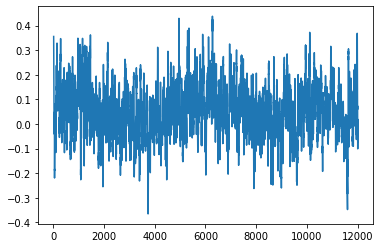

In [4]:
moonstoneSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(moonstoneLowercased)))
moonstoneSentiments = pd.Series([getSentiment(sent) for sent in moonstoneSents])
moonstoneSentiments.rolling(20).mean().plot()

Graph 1 (Sentiment Analysis on The Moonstone as a whole)

Despite some extremes, even after putting the sentences into groups of 20, we can follow the bulk and see that there is a general pattern of sentiments going up and down within a reasonable range throughout the novel.

### Quotes and Narration

Next, let's break the text into two parts, quotes and narration, for each of which sentiment analysis will be performed.

In [5]:
moonstoneQuotesList = getQuotesAsList(moonstoneLowercased)
moonstoneNarrationList = getNarrationAsList(moonstoneLowercased)

moonstoneQuotesString = turnListIntoString(moonstoneQuotesList)
moonstoneNarrationString = turnListIntoString(moonstoneNarrationList)

moonstoneQuotesSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(moonstoneQuotesString)))
moonstoneNarrationSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(moonstoneNarrationString)))

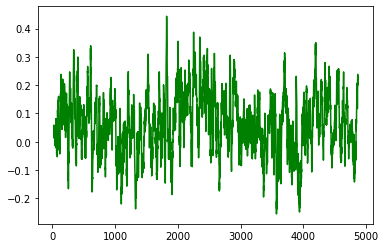

In [6]:
moonstoneQuotesSentiments = pd.Series([getSentiment(sent) for sent in moonstoneQuotesSents])
moonstoneQuotesSentiments.rolling(20).mean().plot(color='green')

Graph 2-1 (Sentiment Analysis on "Quotations" in The Moonstone)

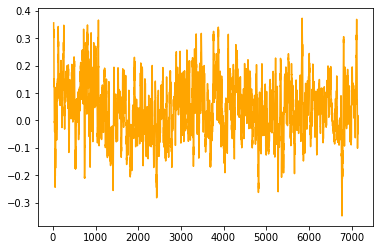

In [7]:
moonstoneNarrationSentiments = pd.Series([getSentiment(sent) for sent in moonstoneNarrationSents])
moonstoneNarrationSentiments.rolling(20).mean().plot(color='orange')

Graph 2-2 (Sentiment Analysis on "Narration" in The Moonstone)

While it is clear that Graph 1 is the average of Graphs 2-1 and 2-2, it is interesting to find that sentiments from the overall narration of the novel get both more extreme(more instances of positive peaks with the lower boundary being -0.3 instead of -0.2 in the case of quotations) and more gathered around the middle than sentiments from quotations in the novel.

### Sentiment Analysis on Quotes and Narration for the Narration Parts

Now, we turn to the different narration parts in the novel.

In [8]:
moonstoneParts = moonstone.split('##')
betteredgeParts = moonstoneParts[5:29]
clackParts = moonstoneParts[31:39]
bruffParts = moonstoneParts[40:43]
blakeParts = moonstoneParts[44:53]

def textToQuotesString(textList):
    textString = turnListIntoString(textList)
    textQuotesList = getQuotesAsList(textString)
    textQuotesString = turnListIntoString(textQuotesList)
    return textQuotesString

def textToNarrationString(textList):
    textString = turnListIntoString(textList)
    textNarrationList = getNarrationAsList(textString)
    textNarrationString = turnListIntoString(textNarrationList)
    return textNarrationString

In [9]:
betteredgeSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(turnListIntoString(betteredgeParts))))
betteredgeQuotesString = textToQuotesString(betteredgeParts)
betteredgeQuotesSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(betteredgeQuotesString)))
betteredgeNarrationString = textToNarrationString(betteredgeParts)
betteredgeNarrationSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(betteredgeNarrationString)))

clackSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(turnListIntoString(clackParts))))
clackQuotesString = textToQuotesString(clackParts)
clackQuotesSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(clackQuotesString)))
clackNarrationString = textToNarrationString(clackParts)
clackNarrationSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(clackNarrationString)))

bruffSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(turnListIntoString(bruffParts))))
bruffQuotesString = textToQuotesString(bruffParts)
bruffQuotesSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(bruffQuotesString)))
bruffNarrationString = textToNarrationString(bruffParts)
bruffNarrationSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(bruffNarrationString)))

blakeSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(turnListIntoString(blakeParts))))
blakeQuotesString = textToQuotesString(blakeParts)
blakeQuotesSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(blakeQuotesString)))
blakeNarrationString = textToNarrationString(blakeParts)
blakeNarrationSents = nltk.sent_tokenize(removePunctuationButEndings(removeLineBreaks(blakeNarrationString)))

#### Betteredge

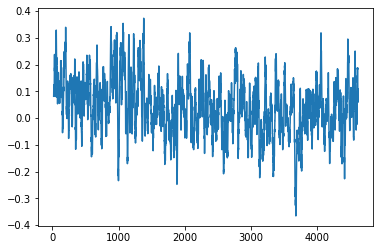

In [10]:
betteredgeSentiments = pd.Series([getSentiment(sent) for sent in betteredgeSents])
betteredgeSentiments.rolling(20).mean().plot()

Graph 3-1-1 (Sentiment Analysis on Betteredge's Narrative)

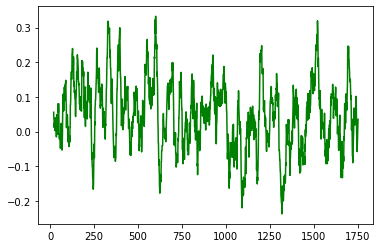

In [11]:
betteredgeQuotesSentiments = pd.Series([getSentiment(sent) for sent in betteredgeQuotesSents])
betteredgeQuotesSentiments.rolling(20).mean().plot(color='green')

Graph 3-1-2 (Sentiment Analysis on "Quotes" from Betteredge's Narrative)

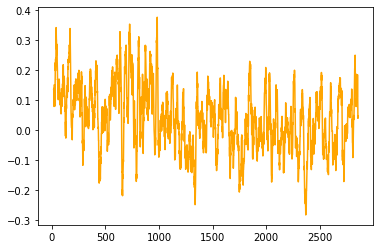

In [12]:
betteredgeNarrationSentiments = pd.Series([getSentiment(sent) for sent in betteredgeNarrationSents])
betteredgeNarrationSentiments.rolling(20).mean().plot(color='orange')

Graph 3-1-3 (Sentiment Analysis on "Narration" from Betteredge's Narrative)

Again, sentiments from Betteredge's narrative range more widely in valence than those from quotes in the corresponding part of the novel. The fact that this finding aligns with that from the earlier graphs on the novel as a whole is understandable because Betteredge's narrative has the largest portion among all the narration parts. One outlier from this pattern can be found at around the 1500th sentence in quotes.

#### Clack

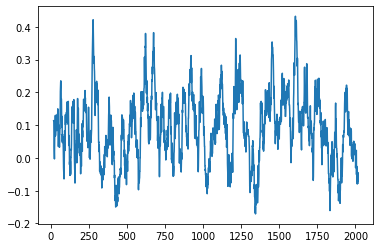

In [13]:
clackSentiments = pd.Series([getSentiment(sent) for sent in clackSents])
clackSentiments.rolling(20).mean().plot()

Graph 3-2-1 (Sentiment Analysis on Clack's Narrative)

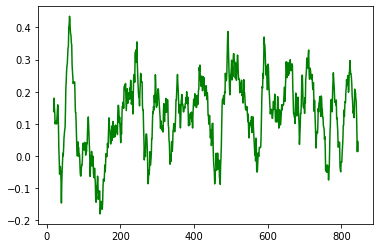

In [14]:
clackQuotesSentiments = pd.Series([getSentiment(sent) for sent in clackQuotesSents])
clackQuotesSentiments.rolling(20).mean().plot(color='green')

Graph 3-2-2 (Sentiment Analysis on "Quotes" from Clack's Narrative)

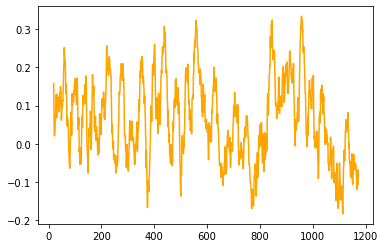

In [15]:
clackNarrationSentiments = pd.Series([getSentiment(sent) for sent in clackNarrationSents])
clackNarrationSentiments.rolling(20).mean().plot(color='orange')

Graph 3-2-3 (Sentiment Analysis on "Narration" from Clack's Narrative)

Sentiments from Clack's narrative displays a pattern opposite to that observed in Betteredge's narrative; quotes show sentiments more extreme on the positive side of valence. In the negative direction, the first third of the narrative reveals more sentiments from quotes, but narration gets more sentimental in the rest of the narrative.

#### Bruff

For this particular narrative, we are calculating the mean of every 10 sentences rather than 20 since grouping by 10 does not negatively affect the readability of the graphs below.

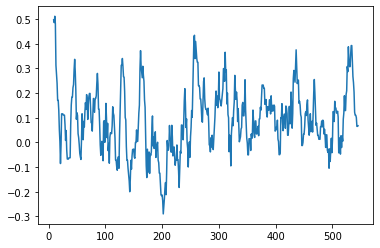

In [16]:
bruffSentiments = pd.Series([getSentiment(sent) for sent in bruffSents])
bruffSentiments.rolling(10).mean().plot()

Graph 3-3-1 (Sentiment Analysis on Bruff's Narrative)

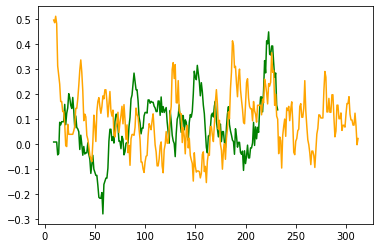

In [17]:
bruffQuotesSentiments = pd.Series([getSentiment(sent) for sent in bruffQuotesSents])
bruffQuotesSentiments.rolling(10).mean().plot(color='green')

bruffNarrationSentiments = pd.Series([getSentiment(sent) for sent in bruffNarrationSents])
bruffNarrationSentiments.rolling(10).mean().plot(color='orange')

Graph 3-3-2 (Sentiment Analysis on "Quotes"(green) compared with "Narration"(orange) from Bruff's Narrative)


Considering that the sentiments from quotes need to be extended to the right so that they can be directly compared against the sentiments from narration, the sentiments from both parts of the narrative show several surprises with differences in quotes' and narration's sentiments including the beginning, where Bruff reveals his emotions as a narrator.

#### Blake

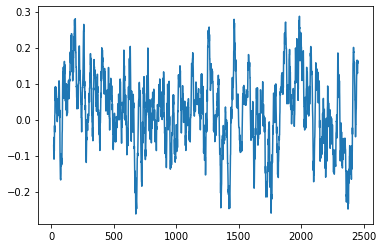

In [18]:
blakeSentiments = pd.Series([getSentiment(sent) for sent in blakeSents])
blakeSentiments.rolling(20).mean().plot()

Graph 3-4-1 (Sentiment Analysis on Blake's Narrative)

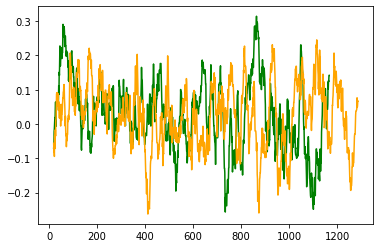

In [19]:
blakeQuotesSentiments = pd.Series([getSentiment(sent) for sent in blakeQuotesSents])
blakeQuotesSentiments.rolling(20).mean().plot(color='green')

blakeNarrationSentiments = pd.Series([getSentiment(sent) for sent in blakeNarrationSents])
blakeNarrationSentiments.rolling(20).mean().plot(color='orange')

Graph 3-4-2 (Sentiment Analysis on "Quotes"(green) compared with "Narration"(orange) from Blake's Narrative)

Finally, for Blake's narrative, his narration marks some points with relatively lower sentiments on the negative side of valence whereas it is quotes that raise sentiment scores in the direction of positivity. 

### Limitations

The more we dig into the voice of a narrator, the more we will know about the narrator. However, this paper has its own limitations. Primarily, since quotes and narration do not necessarily match in length, the number of sentences in this paper, it is not so easy to directly compare the sentiments from those two parts. One way to solve this problem is to divide each narrator into subparts with a common topic so that quotes and narration in each of the subparts can be compared, and this will help us look at the two subparts that are relevant to one another in context. Additionally, findings in this paper heavily depend on the accuracy of the way in which sentimental scores are calculated using the "polarity_score" method in SentimentIntensityAnalyzer(). It seems necessary to search for altenative ways to analyze emotional aspects of a text. 

### Extensions

Still, this paper can possibly lead to extensions. For instance, we can use WordNet's synset function with which different words can be grouped into categories by finding their synonyms. This way, we can attempt to narrow down our choice set of words; the fewer words we have to deal with, the easier it becomes to find patterns. Then, such patterns can be implemented into the sentiment analysis performed in this paper. Also, we can categorize words into descriptive parts of speech(POS). As an example, I have written some code below to identify adjectives, adverbs and verbs in The Moonstone. Using the code, we can find a way to maximize the benefit of the "polarity_score" method. Because it meainly focuses on what individual words, rather than phrases or a series of words, are used in a text, we can feed it individual words that we selectively choose to be both common and expressive so that sentiment analysis on the words can yield more accurate, meaningful output.

In [20]:
moonstoneTokens = moonstoneLowercased.split()
moonstonePOS = nltk.pos_tag(moonstoneTokens)

moonstoneAdjs = []
moonstoneAdvs = []
moonstoneVerbs = []
for wordTagPair in moonstonePOS:
    word, tag = wordTagPair
    # To include all forms of adjectives
    if tag == 'JJ' or tag == 'JJR' or tag == 'JJS':
        moonstoneAdjs.append([word, tag])
    # Below, with adverbs, 'WRB's or Wh-adverbs are intentionally omitted to focus solely on those that describe characters and events
    elif tag == 'RB' or tag == 'RBR' or tag == 'RBS':
        moonstoneAdvs.append([word, tag])
    # Below, we need to account for all types of verbs
    elif tag == 'VB' or tag == 'VBD' or tag == 'VBG' or tag == 'VBN' or tag == 'VBP' or tag == 'VBZ':
        moonstoneVerbs.append([word, tag])

In [21]:
def stemsOf(textList):
    stemList = []
    lancasterStemmer = nltk.stem.lancaster.LancasterStemmer()
    for wordTagPair in textList:
        word, tag = wordTagPair
        stem = lancasterStemmer.stem(word)
        stemList.append(stem)
    return stemList

def lemmasOf(textList):
    lemmaList = []
    lemmatizer = nltk.stem.WordNetLemmatizer()
    for wordTagPair in textList:
        word, tag = wordTagPair
        lemma = lemmatizer.lemmatize(word)
        lemmaList.append(lemma)
    return lemmaList

In [22]:
moonstoneAdjStems = stemsOf(moonstoneAdjs)
moonstoneAdvStems = stemsOf(moonstoneAdvs)
moonstoneVerbLemmas = lemmasOf(moonstoneVerbs)

In [23]:
moonstoneCommonAdjStems = Counter(moonstoneAdjStems).most_common(150)
moonstoneCommonAdvStems = Counter(moonstoneAdvStems).most_common(150)
moonstoneCommonVerbStems = Counter(moonstoneVerbLemmas).most_common(150)

In [24]:
moonstoneAdjsOnly = []
for wordTagPair in moonstoneAdjs:
    word, tag = wordTagPair
    moonstoneAdjsOnly.append(word)
moonstoneAdjsOnlyCommon = Counter(moonstoneAdjsOnly).most_common(150)


In [25]:
def getWordsOnly(text):
    onlyWords = []
    for pair in text:
        word, i = pair
        onlyWords.append(word)
    return onlyWords

commonAdjs = getWordsOnly(moonstoneAdjsOnlyCommon)

# pd.Series([getSentiment(adj) for adj in commonAdjs]).plot()

### Conclusion

After carefully observing how each of the four narrators uses quotes and narration to form a certain voice with respect to sentiments, it is apparent that more attention needs to be paid to the comparison between sentiments from the two parts rather than to the overall sentiments. For Betteredge, narration displays a wider range of sentiments while Clack's narrative shows an opposite pattern with quotes revealing more sentiments. On the other hand, both quotes and narration in Bruff's narrative display both ups and downs with sentiments higher and lower, respectively, than their counterparts. Lastly, Blake's narrative is quite balanced between quotes and narration in terms of when to display higher or lower sentiments.

Unexpectedly, there seems to be no particular pattern as to whether the different narrators carry their voice through quotes or narration. Nevertheless, this suggests that the sentimental differences between the quotes and narration in a narrative provide a hint at what kind of a narrator he or she is. If quotes get more sentimental than narration, the narrator has chosen to make characters speak for themselves regardless of his or her intention to do so. If narration gets more sentimental, the narrator has decided to directly speak to the reader. Unfortunately, this paper has fallen short of providing enough details to identify narrators' hidden intentions behind their decisions to use more of quotes or narration. However, I anticipate that if more studies are done to dig deeper into what characters say about whom or what, and this is combined into the sentiment analysis as performed in this paper, we as readers can find out more about narrators' styles and more interestingly their intentions for their voice.

### Works Cited

Collins, William Wilkie. *The Moonstone*, Tinsley Brothers, 1868, icla2020.jonreeve.com/texts/moonstone.html.

Morgan, Kori. "Analysis of Voice in a Narrative", Seattlepi, 21 Nov. 2017, education.seattlepi.com/analysis-voice-narrative-5990.html.